In [1]:
import numpy as np
import pandas as pd

In [2]:
prior_lims = np.array([
    (0.1, 0.5),  # Omega_m
    (0.03, 0.07),  # Omega_b
    (0.5, 0.9),  # h
    (0.8, 1.2),  # n_s
    (0.6, 1.0),  # sigma8
])

In [3]:
from pyDOE import lhs

Nsamp = 2000
np.random.seed(0)

# Sample prior_lims as a latin hypercube
samples = lhs(len(prior_lims), samples=Nsamp)

# Scale samples to the prior limits
scaled_samples = prior_lims[:, 0] + samples * \
    (prior_lims[:, 1] - prior_lims[:, 0])

In [4]:
# Load the space-separated file
file_path = '/home/x-mho1/git/ltu-cmass/params/latin_hypercube_params.txt'
loaded_data = np.loadtxt(file_path)

# Print the loaded data
print(loaded_data)

[[0.1755  0.06681 0.7737  0.8849  0.6641 ]
 [0.2139  0.05557 0.8599  0.9785  0.8619 ]
 [0.1867  0.04503 0.6189  0.8307  0.7187 ]
 ...
 [0.2911  0.0419  0.5102  0.8431  0.8327 ]
 [0.3256  0.0405  0.8824  0.9073  0.8804 ]
 [0.3874  0.0507  0.5905  0.845   0.6515 ]]


In [5]:
# Check if any rows in loaded_data and scaled_samples are alike
rows_alike = np.all(np.isclose(
    loaded_data[:2000, None], scaled_samples, atol=1e-4), axis=-1)

# Count the number of alike rows
count_alike = np.sum(rows_alike)

# Print the result
print("Number of alike rows:", count_alike)

Number of alike rows: 0


In [32]:
import sys
# Print scaled_samples as space-separated values with 4 decimal places
np.savetxt(sys.stdout, scaled_samples, fmt='%.4f', delimiter=' ')

0.2157 0.0594 0.5367 1.1701 0.8430
0.4366 0.0413 0.8534 0.9977 0.9543
0.1750 0.0414 0.5103 0.8554 0.8977
0.2348 0.0380 0.8902 1.1178 0.8198
0.2370 0.0427 0.6670 1.1745 0.7811
0.3760 0.0659 0.8909 1.1299 0.7986
0.2653 0.0565 0.7694 0.8405 0.8595
0.1182 0.0514 0.6229 0.9577 0.7105
0.3050 0.0407 0.5883 0.8544 0.6811
0.3862 0.0461 0.7884 1.1579 0.9935
0.3482 0.0469 0.7609 1.0543 0.8189
0.2867 0.0414 0.7225 0.9288 0.8895
0.4223 0.0643 0.7568 1.0431 0.6747
0.4743 0.0445 0.5765 1.1161 0.8334
0.3816 0.0645 0.5492 0.8696 0.6620
0.3127 0.0557 0.6560 1.0202 0.6380
0.3481 0.0627 0.6833 0.9260 0.8406
0.4215 0.0403 0.8468 1.1327 0.7574
0.1603 0.0322 0.7519 0.9458 0.6837
0.4684 0.0595 0.8610 1.0363 0.7581
0.1976 0.0551 0.5971 0.9771 0.9636
0.2583 0.0657 0.7946 0.8854 0.6230
0.2012 0.0416 0.8547 1.1809 0.7755
0.1398 0.0621 0.8350 1.0864 0.9642
0.3594 0.0647 0.6165 1.1844 0.7506
0.4116 0.0493 0.6434 0.8101 0.7968
0.3445 0.0454 0.8694 0.9766 0.7675
0.1763 0.0463 0.6065 0.8561 0.9106
0.3748 0.0374 0.7240

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

scaled_samples

# Convert scaled_samples to a DataFrame for easier plotting
df_scaled_samples = pd.DataFrame(scaled_samples, columns=[
                                 'Omega_m', 'Omega_b', 'h', 'n_s', 'sigma8'])

# Plot the corner plot
sns.pairplot(df_scaled_samples)
plt.show()

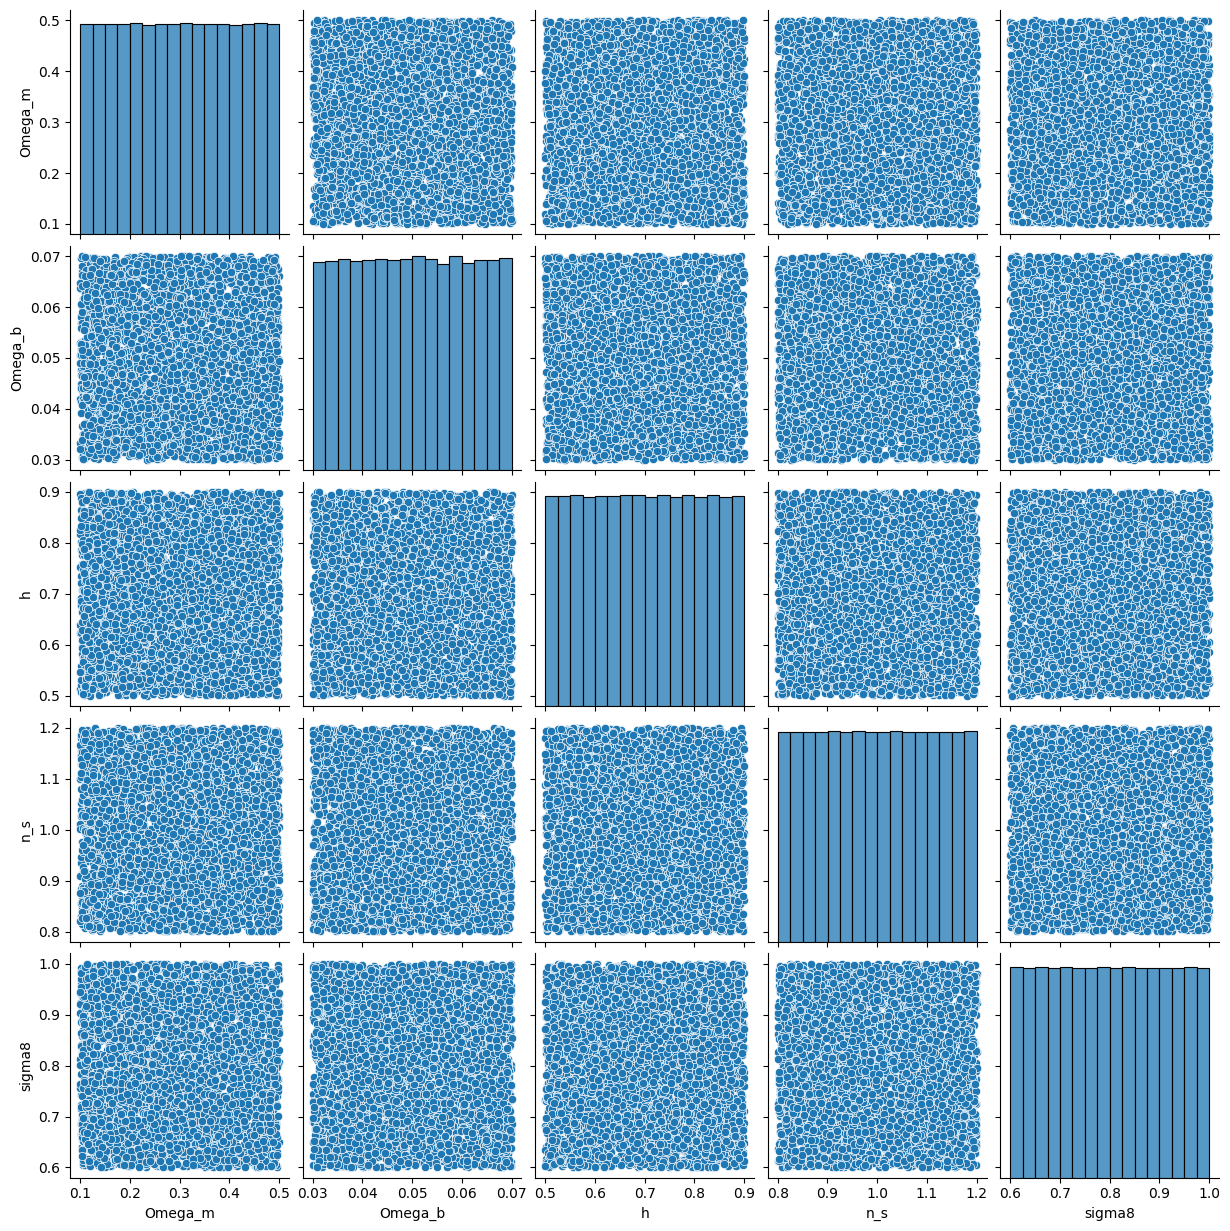

In [34]:
# Convert loaded_data to a DataFrame for easier plotting
df_loaded_data = pd.DataFrame(
    loaded_data, columns=['Omega_m', 'Omega_b', 'h', 'n_s', 'sigma8'])

# Plot the corner plot
sns.pairplot(df_loaded_data)
plt.show()